In [4]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

In [5]:
file = open("table.txt", "r").read()

In [6]:
file

'0\t45\t30\n100\t43\t30\n200\t43\t29\n300\t41.5\t28\n400\t41\t27\n500\t40\t24\n600\t38\t25\n700\t38\t24\n800\t38\t21\n900\t37\t23\n1000\t35\t22\n1100\t35\t21\n1200\t32\t20\n1300\t26\t19\n1400\t26\t18\n1500\t21\t18\n1600\t20\t18\n1700\t17\t19\n1800\t17\t20\n1900\t18\t20\n2000\t17\t22\n2100\t18\t21\n2200\t22\t23\n2300\t23\t26\n2400\t26\t28\n2500\t30\t29\n2600\t34\t33\n2700\t37\t36\n2800\t39\t42\n2900\t43\t44\n3000\t47\t45\n3100\t48\t47\n3200\t51\t51\n3300\t57\t55\n3400\t59\t60\n3500\t59\t60\n4000\t71\t67\n4500\t73\t74\n5000\t75\t74\n5500\t81\t78\n6000\t82\t76\n6500\t81\t77\n7000\t82\t79'

In [7]:
def string_to_np_array(input_string):
    divisions = input_string.split('\n')
    result_2d_list = np.array([list(map(float, division.split('\t'))) for division in divisions])
    return result_2d_list
string_to_np_array(file)

array([[   0. ,   45. ,   30. ],
       [ 100. ,   43. ,   30. ],
       [ 200. ,   43. ,   29. ],
       [ 300. ,   41.5,   28. ],
       [ 400. ,   41. ,   27. ],
       [ 500. ,   40. ,   24. ],
       [ 600. ,   38. ,   25. ],
       [ 700. ,   38. ,   24. ],
       [ 800. ,   38. ,   21. ],
       [ 900. ,   37. ,   23. ],
       [1000. ,   35. ,   22. ],
       [1100. ,   35. ,   21. ],
       [1200. ,   32. ,   20. ],
       [1300. ,   26. ,   19. ],
       [1400. ,   26. ,   18. ],
       [1500. ,   21. ,   18. ],
       [1600. ,   20. ,   18. ],
       [1700. ,   17. ,   19. ],
       [1800. ,   17. ,   20. ],
       [1900. ,   18. ,   20. ],
       [2000. ,   17. ,   22. ],
       [2100. ,   18. ,   21. ],
       [2200. ,   22. ,   23. ],
       [2300. ,   23. ,   26. ],
       [2400. ,   26. ,   28. ],
       [2500. ,   30. ,   29. ],
       [2600. ,   34. ,   33. ],
       [2700. ,   37. ,   36. ],
       [2800. ,   39. ,   42. ],
       [2900. ,   43. ,   44. ],
       [30

In [5]:
n_1=complex(1.531, -0.002) # комплексный показатель преломления призмы (Zeonex)
eps_1=n_1**2 # диэлектрическая проницаемость призмы (Zeonex)
eps_2=1 # диэлектрическая проницаемость воздуха
eps_3=complex(2.56, -0.002) # диэлектрическая проницаемость тонкого слоя диэлектрика на InSb 940-i*260 -15+i*700

#Параметры InSb в модели Друде Лоренца
wp=0.578*10**14 #плазменная частота (рад/с)
gp=1/5.16*10**3  #частота столкновений (рад/с)
wl=3.4*10**13 #частота Лоренца (рад/с)
gl=1/3*10**12 #Лоренцева частота столкновений (рад/с)
Al=2.02 #Амплитуда в модели Лоренца
eps0=15.86 #диэлектрическая проницаемость на бесконечности

wavelength=197*10**(-6)  #длина волны излучения
f=3*10**8/wavelength  #частота излучения
w=6.28*f  #круговая частота

#Модель Друде-Лоренца для проницаемости InSb
eps_4=eps0-wp**2/complex(w**2, gp*w)+Al*wl**2/complex(wl**2-w**2, -gl*w) 

d_2=np.linspace(0*10**(-6), 450*10**(-6), 450)  #величина зазора между призмой и InSb
d_3=4.7*10**(-6) 
teta=42.21*np.pi/180  #угол падения в призме

# f=1.5*10**12:0.01*10**12:2*10**12 
# w=6.28*f 
# 
# #Модель Друде-Лоренца для проницаемости InSb
# for j=1:1:length(w)
#     eps(j)=eps0-wp**2/(w(j)**2+i*gp*w(j))+Al*wl**2/(wl**2-w(j)**2-i*gl*w(j)) 
# end 
# plot (f, real(eps), f, imag(eps)) 

In [11]:
kz_1=np.sqrt(eps_1)*np.cos(teta)
kz_2=np.sqrt(eps_2-eps_1*np.sin(teta)**2)
kz_3=np.sqrt(eps_3-eps_1*np.sin(teta)**2)
kz_4=np.sqrt(eps_4-eps_1*np.sin(teta)**2)
#Коэффициенты отражения
r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
r_23=(eps_3*kz_2-eps_2*kz_3)/(eps_3*kz_2+eps_2*kz_3)
r_34=(eps_4*kz_3-eps_3*kz_4)/(eps_4*kz_3+eps_3*kz_4)

#Коэффициенты пропускания
t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2)
t_23=2*kz_2*np.sqrt(eps_2*eps_3)/(eps_3*kz_2+eps_2*kz_3)
t_34=2*kz_3*np.sqrt(eps_3*eps_4)/(eps_4*kz_3+eps_3*kz_4)

#Матрица преобразования
S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])
S3=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34, 
              r_34*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34], 
                [r_34*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34, 
                 np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34]])


(2, 2)


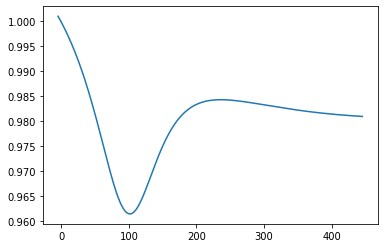

In [7]:
R = []
for j in range(len(d_2)):   #1:1:length(d_2)
    S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
    S=S1@S2@S3
    R += [abs(S[1][0]/S[0][0])]


plt.plot((d_2-d_3)*10**6, R)


#Data=np.array([(d_2-d_3)*10**6, R])



### e4 = complex(-17.3, 7.12)
#InSb

In [7]:
inc_angle = 40*2*math.pi/360
angle = np.pi/4-np.arcsin(np.sin(np.pi/4-inc_angle)/np.sqrt(e1))
e1 = 1
e2 = 1

w_len = 197*pow(10, -6)
def kx(e3):
    return 2*np.pi/w_len/np.sqrt(e2)*np.sqrt(e2*e3/(e2+e3))

def kz1(e3):
    return kx(e3)*np.sqrt(e1-e1*pow(np.sin(angle), 2))

def kz2(e3):
    return kx(e3)*np.sqrt(e2-e1*pow(np.sin(angle), 2))

def kz3(e3):
    return kx(e3)*np.sqrt(e3-e1*pow(np.sin(angle), 2))

def optim(e3):
    return abs(d  + 0.5*kz2*complex(0, 1) * np.log(-(kz1-e1*kz2)(kz2*e3+kz3(e3))/(kz2*e3-kz3(e3))/(kz1+e1*kz2)  ))



NameError: name 'e1' is not defined

In [ ]:
help("complex")

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.

In [ ]:
help("scipy.least_squares")

No Python documentation found for 'scipy.least_squares'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [86]:
a = np.array([[1, 2], [3, 4]])
a@a

array([[ 7, 10],
       [15, 22]])

In [75]:
a=np.empty(0)
np.append(a, [1])

array([1.])

In [119]:
help("numpy.append")

Help on function append in numpy:

numpy.append = append(arr, values, axis=None)
    Append values to the end of an array.
    
    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.
    
    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.
    
    See Also
    --------
    insert : Insert elements into an array.
    delete

In [131]:
for i in range(5):
    print(i)

0
1
2
3
4
